# Data Exploration

In [237]:
import pandas_datareader.data as web
import pandas as pd 
import matplotlib.pyplot as plt
import datetime
%matplotlib inline
from pandas.plotting import scatter_matrix
import seaborn as sns


In [25]:
start=datetime.datetime(2016,1,1)
end=datetime.datetime(2021,1,1)

In [29]:
amazon=web.DataReader("AMZN","yahoo",start,end)
google=web.DataReader("GOOG","yahoo",start,end)
facebook=web.DataReader("fb","yahoo",start,end)

In [34]:
amazon.head()
google.head()
facebook.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-12-31,106.169998,104.620003,106.000000,104.660004,18391100,104.660004
2016-01-04,102.239998,99.750000,101.949997,102.220001,37912400,102.220001
2016-01-05,103.709999,101.669998,102.889999,102.730003,23258200,102.730003
2016-01-06,103.769997,100.900002,101.129997,102.970001,25096200,102.970001
2016-01-07,101.430000,97.300003,100.500000,97.919998,45172900,97.919998


In [36]:
amazon.isna().sum()

High         0
Low          0
Open         0
Close        0
Volume       0
Adj Close    0
dtype: int64

In [37]:
google.isna().sum()

High         0
Low          0
Open         0
Close        0
Volume       0
Adj Close    0
dtype: int64

In [38]:
facebook.isna().sum()

High         0
Low          0
Open         0
Close        0
Volume       0
Adj Close    0
dtype: int64

In [41]:
facebook.info()
amazon.info()
google.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1260 entries, 2015-12-31 to 2020-12-31
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       1260 non-null   float64
 1   Low        1260 non-null   float64
 2   Open       1260 non-null   float64
 3   Close      1260 non-null   float64
 4   Volume     1260 non-null   int64  
 5   Adj Close  1260 non-null   float64
dtypes: float64(5), int64(1)
memory usage: 68.9 KB
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1260 entries, 2015-12-31 to 2020-12-31
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       1260 non-null   float64
 1   Low        1260 non-null   float64
 2   Open       1260 non-null   float64
 3   Close      1260 non-null   float64
 4   Volume     1260 non-null   int64  
 5   Adj Close  1260 non-null   float64
dtypes: float64(5), int64(1)
memory usage: 68.9 KB
<class 'pa

In [113]:
facebook.to_csv("fb_stocks.csv")
amazon.to_csv("amazon_stocks.csv")
google.to_csv("google_stocks.csv")

# Lowest close of all the stocks ?

In [69]:
facebook[facebook['Close']==facebook['Close'].min()]

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2016-01-21,95.989998,92.620003,94.910004,94.160004,30518900,94.160004


In [64]:
amazon[amazon['Close']==amazon['Close'].min()]

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2016-02-09,498.380005,474.0,478.01001,482.070007,7077900,482.070007


In [65]:
google[google['Close']==google['Close'].min()]


,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2016-06-27,672.299988,663.283997,671.0,668.26001,2629000,668.26001


In [74]:
facebook=facebook.reset_index()
amazon=amazon.reset_index()
google=google.reset_index()
facebook.head()

,index,Date,High,Low,Open,Close,Volume,Adj Close
0,0,2015-12-31,106.169998,104.620003,106.000000,104.660004,18391100,104.660004
1,1,2016-01-04,102.239998,99.750000,101.949997,102.220001,37912400,102.220001
2,2,2016-01-05,103.709999,101.669998,102.889999,102.730003,23258200,102.730003
3,3,2016-01-06,103.769997,100.900002,101.129997,102.970001,25096200,102.970001
4,4,2016-01-07,101.430000,97.300003,100.500000,97.919998,45172900,97.919998


In [85]:
facebook['month'] = pd.DatetimeIndex(facebook['Date']).month 
google['month'] = pd.DatetimeIndex(google['Date']).month 
amazon['month'] = pd.DatetimeIndex(amazon['Date']).month 


# Amazon Monthly Closing

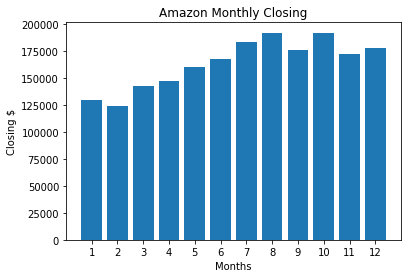

In [108]:
amazon_monthly_closing=amazon.groupby("month").sum()['Close'].reset_index()
plt.title("Amazon Monthly Closing")
plt.bar(amazon_monthly_closing['month'],amazon_monthly_closing['Close'])
plt.xticks(amazon_monthly_closing['month'])
plt.xlabel("Months")
plt.ylabel("Closing $")
plt.show()

# Facebook Monthly Closing

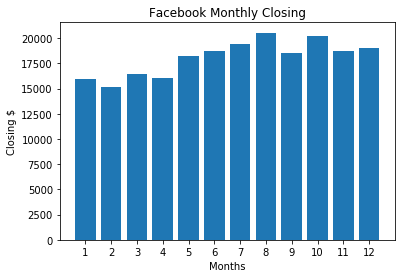

In [109]:
facebook_monthly_closing=facebook.groupby("month").sum()['Close'].reset_index()
plt.title("Facebook Monthly Closing")
plt.bar(facebook_monthly_closing['month'],facebook_monthly_closing['Close'])
plt.xticks(facebook_monthly_closing['month'])
plt.xlabel("Months")
plt.ylabel("Closing $")
plt.show()

# Google Monthly Closing

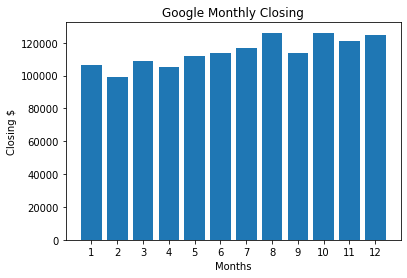

In [111]:
google_monthly_closing=google.groupby("month").sum()['Close'].reset_index()
plt.title("Google Monthly Closing")
plt.bar(google_monthly_closing['month'],google_monthly_closing['Close'])
plt.xticks(google_monthly_closing['month'])
plt.xlabel("Months")
plt.ylabel("Closing $")
plt.show()

# Google Open and Closing Shares

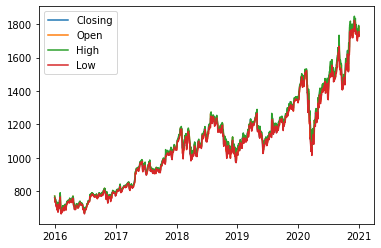

In [144]:
google.set_index("Date")
plt.plot(google['Date'],google['Close'],label ="Closing")
plt.plot(google['Date'],google['Open'],label ="Open")
plt.plot(google['Date'],google['High'],label ="High")
plt.plot(google['Date'],google['Low'],label ="Low")

plt.legend()
plt.show()

In [186]:
google['Open'].iloc[1000:1400].plot

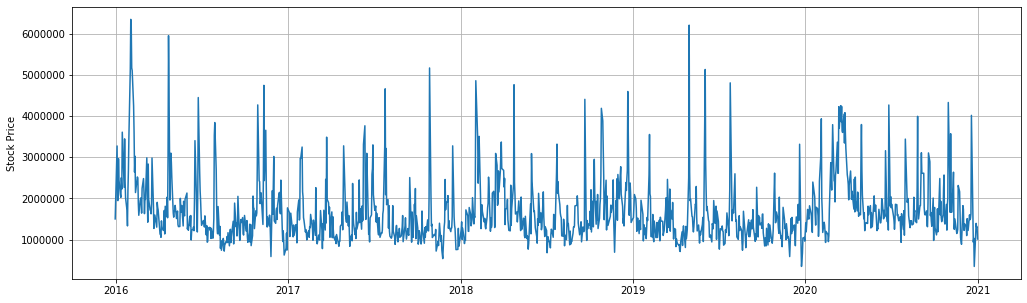

In [152]:
plt.figure(figsize=(17,5))
plt.plot(google['Date'],google['Volume'])
plt.ylabel("Stock Price")
plt.grid()
plt.show()

# Facebook Opening and Closing Shares

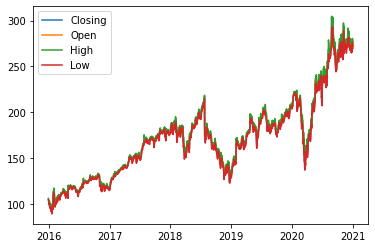

In [145]:
plt.plot(facebook['Date'],facebook['Close'],label ="Closing")
plt.plot(facebook['Date'],facebook['Open'],label ="Open")
plt.plot(facebook['Date'],facebook['High'],label ="High")
plt.plot(facebook['Date'],facebook['Low'],label ="Low")

plt.legend()
plt.show()

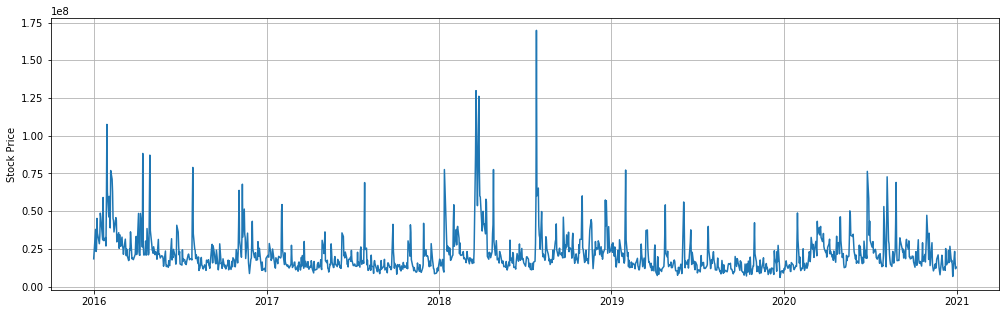

In [153]:
plt.figure(figsize=(17,5))
plt.plot(facebook['Date'],facebook['Volume'])
plt.ylabel("Stock Price")
plt.grid()
plt.show()

# Amazon Opening and Closing Shares

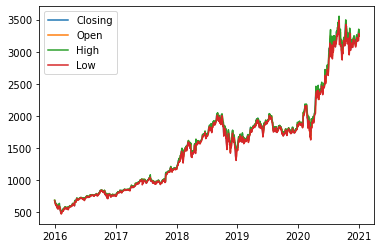

In [146]:
plt.plot(amazon['Date'],amazon['Close'],label ="Closing")
plt.plot(amazon['Date'],amazon['Open'],label ="Open")
plt.plot(amazon['Date'],amazon['High'],label ="High")
plt.plot(amazon['Date'],amazon['Low'],label ="Low")

plt.legend()
plt.show()

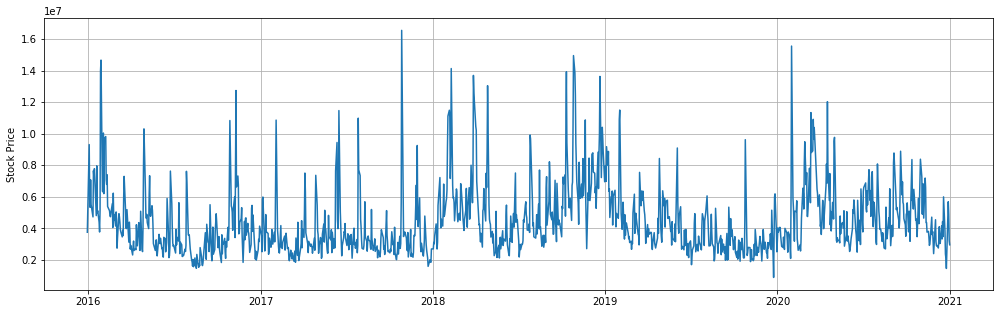

In [154]:
plt.figure(figsize=(17,5))
plt.plot(amazon['Date'],amazon['Volume'])
plt.ylabel("Stock Price")
plt.grid()
plt.show()

In [157]:
google['Total Traded']=google['Open']*google['Volume']
facebook['Total Traded']=facebook['Open']*facebook['Volume']
amazon['Total Traded']=amazon['Open']*amazon['Volume']

In [167]:
google.set_index("Date",inplace=True)
facebook.set_index("Date",inplace=True)
amazon.set_index("Date",inplace=True)

# Total Traded

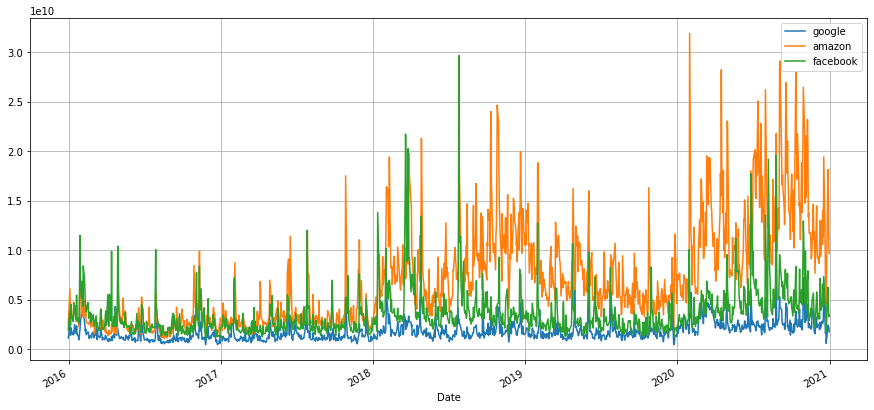

In [173]:
google['Total Traded'].plot(label='google',figsize=(15,7))
amazon['Total Traded'].plot(label='amazon',figsize=(15,7))
facebook['Total Traded'].plot(label='facebook',figsize=(15,7))
plt.legend()
plt.grid()

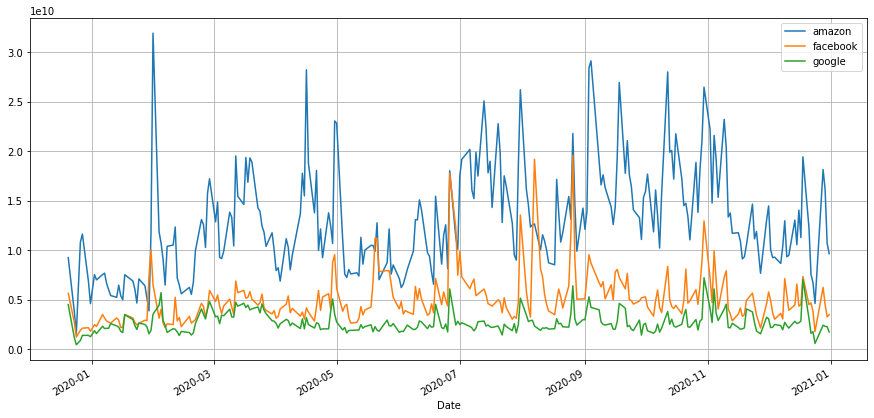

In [184]:
amazon['Total Traded'].iloc[1000:1300].plot(label="amazon",figsize=(15,7))
facebook['Total Traded'].iloc[1000:1300].plot(label="facebook")
google['Total Traded'].iloc[1000:1300].plot(label="google")
plt.legend()
plt.grid()

### Amazon is the most traded share during 2020, because in during lockdown most of people start their own buisness using Amazon FBA and Amazon PL

## Now Check The Relation by using correlation and scatter matrix 

In [190]:
open_share=pd.concat([google['Open'],amazon['Open'],facebook['Open']],axis=1)
open_share.columns=['Google Open', 'Amazon Open','Facebook Open']

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E15F341388>,
      dtype=object)

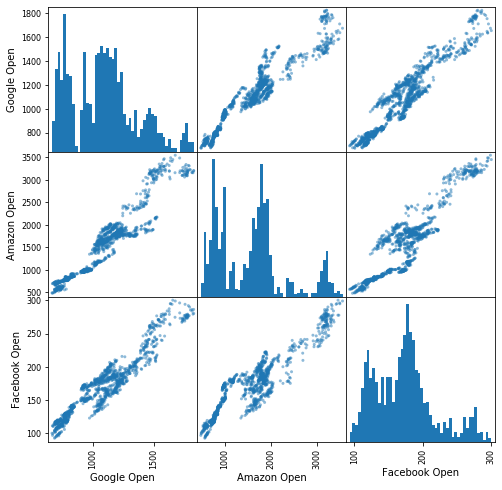

In [192]:
scatter_matrix(open_share,figsize=(8,8),hist_kwds={'bins':50})

## As you see, facebook and google show a possitive good relation between each other

# Correlation of Close stocks

In [238]:
close_share=pd.concat([google['Close'],amazon['Close'],facebook['Close']],axis=1)
close_share.columns=['Google Close', 'Amazon Close','Facebook Close']

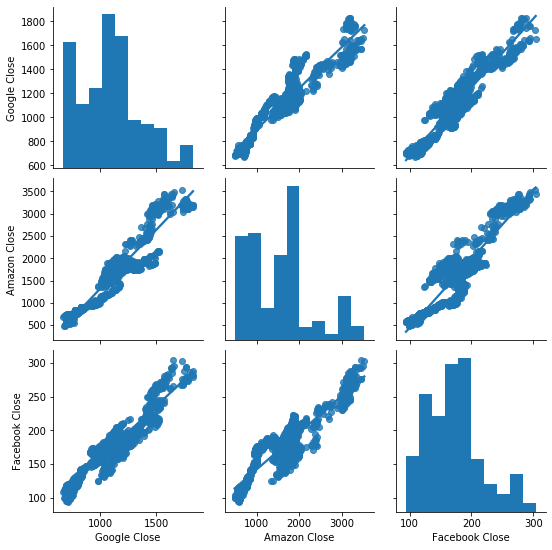

In [241]:
sns.pairplot(close_share, kind='reg')

# Daily Percentage Change

In [194]:
## Or check the volatility of any stock 
facebook['return']=(facebook['Close']/facebook['Close'].shift(1))-1
amazon['return']=(amazon['Close']/amazon['Close'].shift(1))-1
google['return']=(google['Close']/google['Close'].shift(1))-1

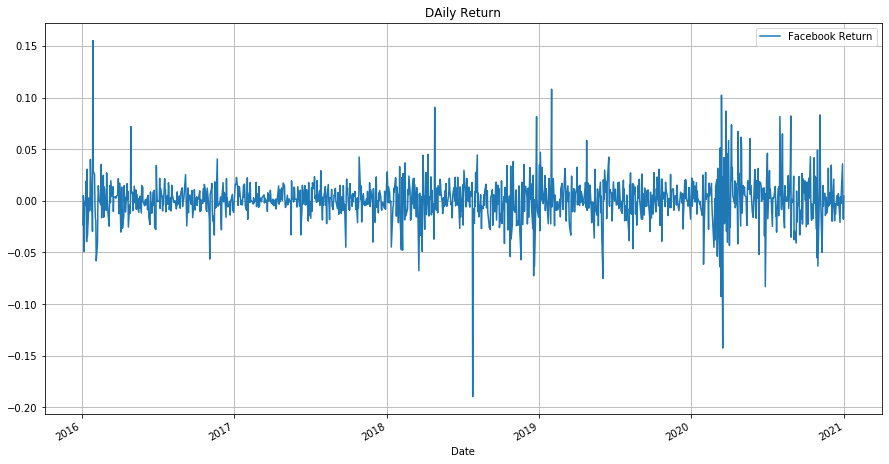

In [231]:
plt.title("DAily Return")
facebook['return'].plot(label='Facebook Return',figsize=(15,8))
plt.legend()
plt.grid()
plt.show()

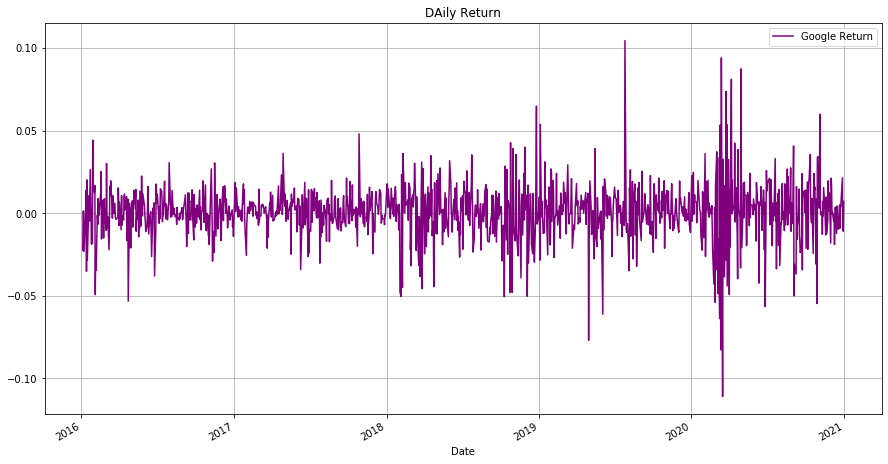

In [233]:
plt.title("DAily Return")
google['return'].plot(label='Google Return',figsize=(15,8),color='purple')
plt.legend()
plt.grid()
plt.show()

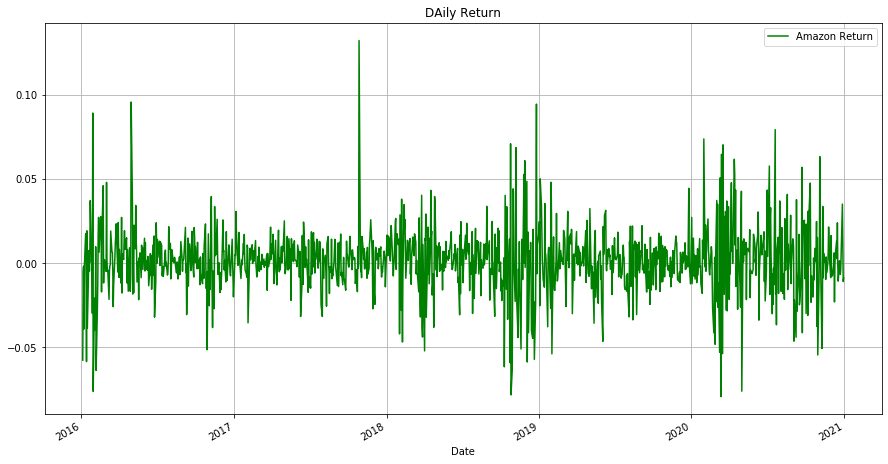

In [236]:
plt.title("DAily Return")
amazon['return'].plot(label='Amazon Return',figsize=(15,8),color="green")
plt.legend()
plt.grid()
plt.show()

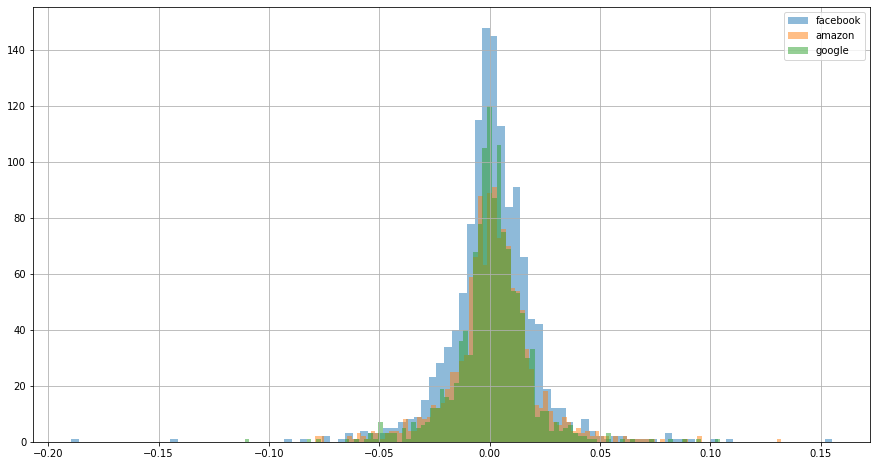

In [199]:
facebook['return'].hist(bins=100, label="facebook",alpha=0.5,figsize=(15,8))
amazon['return'].hist(bins=100, label="amazon",alpha=0.5)
google['return'].hist(bins=100, label="google",alpha=0.5)
plt.legend()

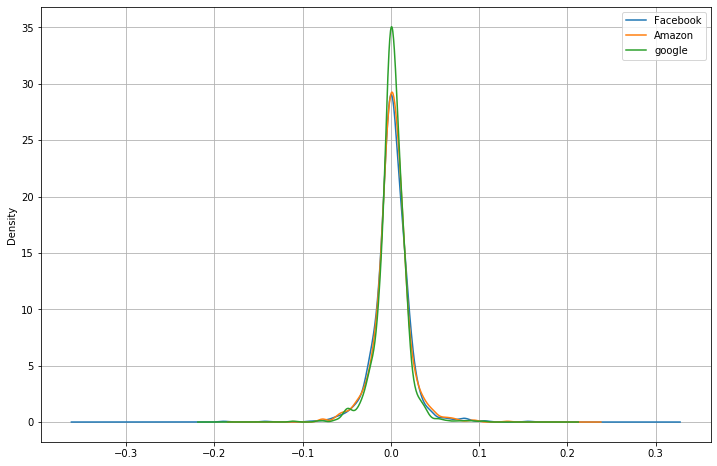

In [206]:
## TO normalize the data you should use KDE = kernal distribution estimation
facebook['return'].plot(kind='kde',label='Facebook',figsize=(12,8))
amazon['return'].plot(kind='kde',label='Amazon',figsize=(12,8))
google['return'].plot(kind='kde',label='google',figsize=(12,8))
plt.legend()
plt.grid()

## Dont be wonder about that spikes of facebook is high in histogram. and here it is down. It shows density and KDE is normalized. So the area of all three stocks are constant 

In [212]:
box=pd.concat([facebook['return'],google['return'],amazon['return']],axis=1)
box.columns=['Facebook Return',"Google Return", "Amazon Return"]
box.head()

,Facebook Return,Google Return,Amazon Return
Date,,,
2015-12-31,NaN,NaN,NaN
2016-01-04,-0.023314,-0.022454,-0.057554
2016-01-05,0.004989,0.000998,-0.005024
2016-01-06,0.002336,0.001400,-0.001799
2016-01-07,-0.049043,-0.023170,-0.039058


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E165F75088>,
      dtype=object)

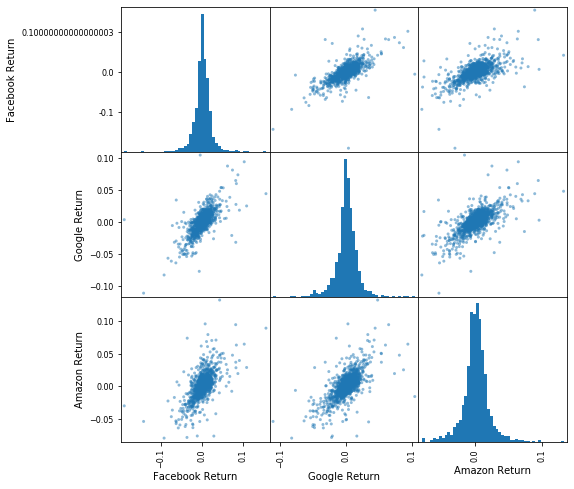

In [213]:
scatter_matrix(box,figsize=(8,8),hist_kwds={'bins':50})

# Cumulative Return 

### we use cumulative return for capture the long term investment. if the cumulative return is greater than 1 you gain profit otherwise you lose it.

In [215]:
facebook['Cumulative Return']=(1+facebook['return']).cumprod()
google['Cumulative Return']=(1+google['return']).cumprod()
amazon['Cumulative Return']=(1+amazon['return']).cumprod()

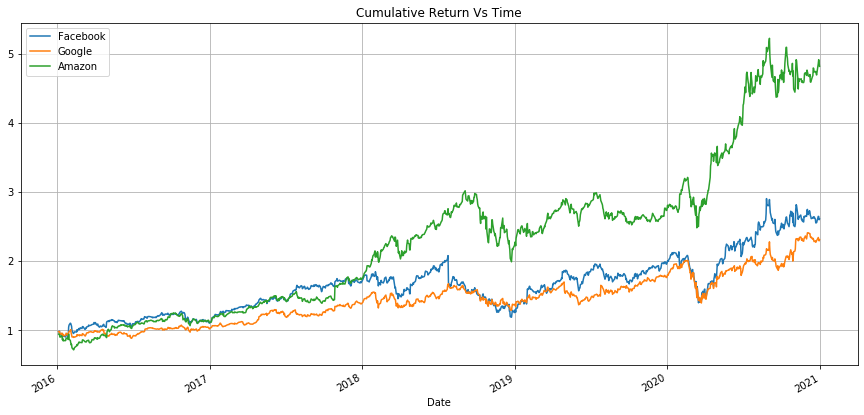

In [222]:
plt.title("Cumulative Return Vs Time")
facebook['Cumulative Return'].plot(label="Facebook",figsize=(15,7))
google['Cumulative Return'].plot(label="Google")
amazon['Cumulative Return'].plot(label="Amazon")
plt.legend()
plt.grid()